#### Essential Libraries

In [1]:
! pip install -U git+https://github.com/twopirllc/pandas-ta

  Cloning https://github.com/twopirllc/pandas-ta to /tmp/pip-req-build-0ltgz0cp
  Running command git clone --filter=blob:none --quiet https://github.com/twopirllc/pandas-ta /tmp/pip-req-build-0ltgz0cp
  Resolved https://github.com/twopirllc/pandas-ta to commit 084dbe1c4b76082f383fa3029270ea9ac35e4dc7
  Preparing metadata (setup.py) ... - done
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=219750 sha256=78eb5ad549b9a47d0ffbf4542eba6f8e7e0863aea6817fbedee1ae2b4b4878d8
  Stored in directory: /tmp/pip-ephem-wheel-cache-8vvounw3/wheels/7f/03/8e/6c5ec9c051db18ca4f345a3bee3371a11b95cce48fdbe1f51e
Successfully built pandas-ta


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import pandas_ta as ta
import plotly.io as pio
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

#### Importing the DF

In [3]:
df = pd.read_csv("/kaggle/input/google-stock-price/GOOG.csv", sep =',')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512
...,...,...,...,...,...,...,...
4853,2023-11-29,138.985001,139.669998,136.294998,136.399994,136.399994,21014700
4854,2023-11-30,136.399994,136.960007,132.789993,133.919998,133.919998,29913500
4855,2023-12-01,133.320007,133.500000,132.151993,133.320007,133.320007,24258400
4856,2023-12-04,131.294006,131.449997,129.399994,130.630005,130.630005,24117100


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4858 entries, 0 to 4857
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4858 non-null   object 
 1   Open       4858 non-null   float64
 2   High       4858 non-null   float64
 3   Low        4858 non-null   float64
 4   Close      4858 non-null   float64
 5   Adj Close  4858 non-null   float64
 6   Volume     4858 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 265.8+ KB


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4858.000000,4858.000000,4858.000000,4858.000000,4858.000000,4.858000e+03
mean,41.477174,41.917059,41.055491,41.494404,41.494404,1.189152e+08
std,38.590695,39.031758,38.193016,38.618107,38.618107,1.512424e+08
min,2.470490,2.534002,2.390042,2.490913,2.490913,1.584340e+05
25%,12.846597,12.954195,12.712414,12.834642,12.834642,2.854912e+07
50%,26.499958,26.728268,26.289323,26.537501,26.537501,6.168836e+07
75%,57.367250,58.028500,56.962251,57.611249,57.611249,1.467329e+08
max,151.863495,152.100006,149.887497,150.709000,150.709000,1.650833e+09


In [6]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

#### Feature Engineering

In [7]:
# Calculate Returns and append to the df DataFrame
df.ta.log_return(cumulative=True, append=True)
df.ta.percent_return(cumulative=True, append=True)

0        0.000000
1        0.079430
2        0.090293
3        0.045146
4        0.056408
          ...    
4853    53.578926
4854    52.586583
4855    52.346503
4856    51.270129
4857    51.974371
Name: CUMPCTRET_1, Length: 4858, dtype: float64

In [8]:
# Renaming the columns so it makes sense
df.rename(columns={"CUMLOGRET_1": "Cumulative Logarithmic Returns", "CUMPCTRET_1": "Cumulative Percentage Returns"}, inplace =True)
df

,Date,Open,High,Low,Close,Adj Close,Volume,Cumulative Logarithmic Returns,Cumulative Percentage Returns
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216,0.000000,0.000000
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488,0.076433,0.079430
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939,0.086446,0.090293
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159,0.044157,0.045146
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512,0.054874,0.056408
...,...,...,...,...,...,...,...,...,...
4853,2023-11-29,138.985001,139.669998,136.294998,136.399994,136.399994,21014700,3.999648,53.578926
4854,2023-11-30,136.399994,136.960007,132.789993,133.919998,133.919998,29913500,3.981299,52.586583
4855,2023-12-01,133.320007,133.500000,132.151993,133.320007,133.320007,24258400,3.976808,52.346503
4856,2023-12-04,131.294006,131.449997,129.399994,130.630005,130.630005,24117100,3.956425,51.270129


In [9]:
df.ta.indicators()

Pandas TA - Technical Analysis Indicators - v0.3.14b0
Total Indicators & Utilities: 205
Abbreviations:
    aberration, above, above_value, accbands, ad, adosc, adx, alma, amat, ao, aobv, apo, aroon, atr, bbands, below, below_value, bias, bop, brar, cci, cdl_pattern, cdl_z, cfo, cg, chop, cksp, cmf, cmo, coppock, cross, cross_value, cti, decay, decreasing, dema, dm, donchian, dpo, ebsw, efi, ema, entropy, eom, er, eri, fisher, fwma, ha, hilo, hl2, hlc3, hma, hwc, hwma, ichimoku, increasing, inertia, jma, kama, kc, kdj, kst, kurtosis, kvo, linreg, log_return, long_run, macd, mad, massi, mcgd, median, mfi, midpoint, midprice, mom, natr, nvi, obv, ohlc4, pdist, percent_return, pgo, ppo, psar, psl, pvi, pvo, pvol, pvr, pvt, pwma, qqe, qstick, quantile, rma, roc, rsi, rsx, rvgi, rvi, short_run, sinwma, skew, slope, sma, smi, squeeze, squeeze_pro, ssf, stc, stdev, stoch, stochrsi, supertrend, swma, t3, td_seq, tema, thermo, tos_stdevall, trima, trix, true_range, tsi, tsignals, ttm_trend, ui, 

In [10]:
help(ta.above)

Help on function above in module pandas_ta.utils._signals:

above(series_a: pandas.core.series.Series, series_b: pandas.core.series.Series, asint: bool = True, offset: int = None, **kwargs)



In [11]:
## Adding some columns into the the df

# Relative Strength Index (RSI)
df.ta.rsi(length=14, append=True) #How quickly a stock's price is rising or falling. It calculates RSI based on the last 14 days of price data.

# Simple Moving Average (SMA)
df.ta.sma(length=50, append=True) # smoothens price data to identify trends over a specified period e.g. 50 days

# Exponential Moving Average (EMA)
df.ta.ema(length=20, append=True) #  gives more weight to recent prices, making it responsive to short-term changes. last 20 days

# Moving Average Convergence Divergence (MACD)
df.ta.macd(fast=12, slow=26, signal=9, append=True) #  helps identify trends and potential trend reversals. 9-day exponential moving average of the MACD line

# Average True Range (ATR)
df.ta.atr(length=14, append=True) # measures market volatility, indicating potential price movement. last 14 days

# Standard Deviation (STD)
df.ta.stdev(length=20, append=True) # measures how spread out values are from the average

# Bollinger Bands
df.ta.bbands(length=20, append=True) # identify volatility and potential reversal points.

# Stochastic Oscillator
df.ta.stoch(fast=14, slow=3, append=True) # identifies overbought or oversold conditions.




,STOCHk_14_3_3,STOCHd_14_3_3
13,NaN,NaN
14,NaN,NaN
15,34.437546,NaN
16,44.913339,NaN
17,69.219167,49.523350
...,...,...
4853,66.666618,72.847675
4854,53.209464,64.420901
4855,32.308077,50.728053
4856,17.793502,34.437014


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4858 entries, 0 to 4857
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date                            4858 non-null   object 
 1   Open                            4858 non-null   float64
 2   High                            4858 non-null   float64
 3   Low                             4858 non-null   float64
 4   Close                           4858 non-null   float64
 5   Adj Close                       4858 non-null   float64
 6   Volume                          4858 non-null   int64  
 7   Cumulative Logarithmic Returns  4858 non-null   float64
 8   Cumulative Percentage Returns   4858 non-null   float64
 9   RSI_14                          4844 non-null   float64
 10  SMA_50                          4809 non-null   float64
 11  EMA_20                          4839 non-null   float64
 12  MACD_12_26_9                    48

In [13]:
df

#20 is the period used for calculating the Bollinger Bands.
# 2.0 is the number of standard deviations used for the bands

,Date,Open,High,Low,Close,Adj Close,Volume,Cumulative Logarithmic Returns,Cumulative Percentage Returns,RSI_14,...,MACDs_12_26_9,ATRr_14,STDEV_20,BBL_20_2.0,BBM_20_2.0,BBU_20_2.0,BBB_20_2.0,BBP_20_2.0,STOCHk_14_3_3,STOCHd_14_3_3
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216,0.000000,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488,0.076433,0.079430,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939,0.086446,0.090293,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159,0.044157,0.045146,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512,0.054874,0.056408,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4853,2023-11-29,138.985001,139.669998,136.294998,136.399994,136.399994,21014700,3.999648,53.578926,52.198621,...,1.001380,2.665243,3.662800,127.775888,134.915998,142.056109,10.584528,0.603920,66.666618,72.847675
4854,2023-11-30,136.399994,136.960007,132.789993,133.919998,133.919998,29913500,3.981299,52.586583,46.326285,...,1.001436,2.772726,3.243764,128.910238,135.233498,141.556759,9.351619,0.396137,53.209464,64.420901
4855,2023-12-01,133.320007,133.500000,132.151993,133.320007,133.320007,24258400,3.976808,52.346503,45.007084,...,0.936365,2.700961,2.885419,129.845782,135.470499,141.095215,8.303972,0.308836,32.308077,50.728053
4856,2023-12-04,131.294006,131.449997,129.399994,130.630005,130.630005,24117100,3.956425,51.270129,39.566958,...,0.788833,2.788036,2.861717,129.904986,135.483499,141.062012,8.234970,0.064983,17.793502,34.437014


Bollinger Bands (BBL_20_2.0, BBM_20_2.0, BBU_20_2.0, BBB_20_2.0, BBP_20_2.0):

BBL (Lower Bollinger Band): This represents the lower boundary of the Bollinger Bands.

BBM (Middle Bollinger Band): This represents the middle line, which is typically a simple moving average.

BBU (Upper Bollinger Band): This represents the upper boundary of the Bollinger Bands.

BBB (Bollinger Bands Width): This represents the width or the difference between the upper and lower Bollinger Bands.

BBP (Bollinger Bands Percentage): This represents the percentage position of the current closing price relative to the Bollinger Bands. It helps identify overbought or oversold conditions.

STOCHk (Stochastic %K): This represents the current closing price as a percentage of the high-low range over a specified period.

STOCHd (Stochastic %D): This is a smoothed version of %K and is typically a 3-day simple moving average of %K.



### Copying Original and Renaming Columns

In [14]:
dfc = df.copy()

In [15]:
dfc.rename(columns={"RSI_14": "Relative Strength Index",
                   "SMA_50": "Simple Moving Average",
                   "EMA_20": "Exponential Moving Average",
                   "MACD_12_26_9": "Moving Average Convergence Divergence",
                   "MACDh_12_26_9": "Moving Average Convergence Divergence (Histogram)",
                   "MACDs_12_26_9": "Moving Average Convergence Divergence (Signal)",
                   "ATRr_14": "Average True Range",
                   "STDEV_20": "Standard Deviation",
                   "BBL_20_2.0": "Lower (Bollinger Band)",
                   "BBM_20_2.0": "Middle (Bollinger Band)",
                   "BBU_20_2.0": "Upper (Bollinger Band)",
                   "BBB_20_2.0": "Bollinger Bands Width",
                   "BBP_20_2.0": "Bollinger Bands Percentage",
                   "STOCHk_14_3_3": "Stochastic %K",
                   "STOCHd_14_3_3": "Stochastic %D"},inplace =True)


In [16]:
dfc

,Date,Open,High,Low,Close,Adj Close,Volume,Cumulative Logarithmic Returns,Cumulative Percentage Returns,Relative Strength Index,...,Moving Average Convergence Divergence (Signal),Average True Range,Standard Deviation,Lower (Bollinger Band),Middle (Bollinger Band),Upper (Bollinger Band),Bollinger Bands Width,Bollinger Bands Percentage,Stochastic %K,Stochastic %D
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216,0.000000,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488,0.076433,0.079430,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939,0.086446,0.090293,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159,0.044157,0.045146,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512,0.054874,0.056408,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4853,2023-11-29,138.985001,139.669998,136.294998,136.399994,136.399994,21014700,3.999648,53.578926,52.198621,...,1.001380,2.665243,3.662800,127.775888,134.915998,142.056109,10.584528,0.603920,66.666618,72.847675
4854,2023-11-30,136.399994,136.960007,132.789993,133.919998,133.919998,29913500,3.981299,52.586583,46.326285,...,1.001436,2.772726,3.243764,128.910238,135.233498,141.556759,9.351619,0.396137,53.209464,64.420901
4855,2023-12-01,133.320007,133.500000,132.151993,133.320007,133.320007,24258400,3.976808,52.346503,45.007084,...,0.936365,2.700961,2.885419,129.845782,135.470499,141.095215,8.303972,0.308836,32.308077,50.728053
4856,2023-12-04,131.294006,131.449997,129.399994,130.630005,130.630005,24117100,3.956425,51.270129,39.566958,...,0.788833,2.788036,2.861717,129.904986,135.483499,141.062012,8.234970,0.064983,17.793502,34.437014


### Visualise the Data

#### Google High

In [17]:
fig2 = px.line(dfc, x='Date', y='High', title='Ranger Slider of Google Highs over time')

fig2.update_xaxes(rangeslider_visible=True, rangeselector=dict(
    buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig2.show()

#### Candlestick

In [18]:
fig = go.Figure()
# add OHLC trace
fig.add_trace(go.Candlestick(x=dfc["Date"],
                             open=dfc['Open'],
                             high=dfc['High'],
                             low=dfc['Low'],
                             close=dfc['Close'],
                             showlegend=True,
                             name='Candlesticks'))


fig.update_xaxes(rangeslider_visible=True, rangeselector=dict(
    buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

#### Bollinger Bands Visualization With Candlesticks

In [19]:
# Plot Bollinger Bands
fig = go.Figure()

# Add candlestick trace
fig.add_trace(go.Candlestick(x=dfc['Date'],
                open=dfc['Open'],
                high=dfc['High'],
                low=dfc['Low'],
                close=dfc['Close'], name='Candlesticks'))

# Add Bollinger Bands traces
fig.add_trace(go.Scatter(x=dfc['Date'], y=dfc['Upper (Bollinger Band)'], mode='lines', line=dict(color='red'), name='Upper Bollinger Band'))
fig.add_trace(go.Scatter(x=dfc['Date'], y=dfc['Middle (Bollinger Band)'], mode='lines', line=dict(color='black'), name='Middle Bollinger Band'))
fig.add_trace(go.Scatter(x=dfc['Date'], y=dfc['Lower (Bollinger Band)'], mode='lines', line=dict(color='blue'), name='Lower Bollinger Band'))


fig.update_xaxes(rangeslider_visible=True, rangeselector=dict(
    buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.update_layout(title='Bollinger Bands Visualization With Candlesticks', xaxis_title='Date', yaxis_title='Price')
fig.show()


#### Relative Strength Index

In [20]:
fig3 = px.line(dfc, x="Date", y='Relative Strength Index',
                 title = "Date vs RSI")
fig3.show()

#### SMA & EMA

In [21]:
# Plot SMA and EMA
fig = go.Figure()

# Add closing price trace
fig.add_trace(go.Scatter(x=dfc['Date'], y=dfc['Close'], mode='lines', name='Close Price'))

# Add SMA and EMA traces
fig.add_trace(go.Scatter(x=dfc['Date'], y=dfc['Simple Moving Average'], mode='lines', line=dict(color='red'), name='SMA (14)'))
fig.add_trace(go.Scatter(x=dfc['Date'], y=dfc['Exponential Moving Average'], mode='lines', line=dict(color='blue'), name='EMA (50)'))

fig.update_layout(title='SMA and EMA Visualization', xaxis_title='Date', yaxis_title='Price')
fig.show()

#### OHLC

In [22]:
fig = make_subplots(rows=2, cols=1)

#OHLC Plot
fig.add_trace(go.Ohlc(x=dfc["Date"], open=dfc["Open"], high=dfc["High"], low=dfc["Low"], close=dfc["Close"], name='Price'), row=1, col=1)
#Volume PLot
fig.add_trace(go.Scatter(x=dfc["Date"], y=dfc["Volume"], name='Volume'), row=2, col=1)

fig.update(layout_xaxis_rangeslider_visible=False)
fig.show()

#### MACD

In [23]:
fig = make_subplots(rows=2, cols=1)

fig.add_trace(go.Scatter(x=dfc["Date"], y=dfc["Close"], name='Close'), row=1, col=1)
fig.add_trace(go.Scatter(x=df["Date"], y=dfc['Moving Average Convergence Divergence'], name='MACD'), row=2, col=1)
fig.add_trace(go.Scatter(x=dfc["Date"], y=dfc['Moving Average Convergence Divergence (Signal)'], name='Signal line'), row=2, col=1)
fig.show()

#### CLR and CPR

In [24]:
# Create a Plotly figure
fig = go.Figure()

# Add Cumulative Percentage Returns line
fig.add_trace(go.Scatter(x=dfc['Date'], y=dfc['Cumulative Percentage Returns'],
                         mode='lines', name='Cumulative Percentage Returns'))

# Add Cumulative Log Returns line
fig.add_trace(go.Scatter(x=dfc['Date'], y=dfc['Cumulative Logarithmic Returns'],
                         mode='lines', name='Cumulative Log Returns'))

# Update layout
fig.update_layout(title='Cumulative Returns Visualization',
                  xaxis_title='Date',
                  yaxis_title='Cumulative Returns',
                  legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01))

# Show the figure
fig.show()


### Predict new prices  

In [25]:
GOOGLC = dfc.filter(['Close']) # filtering to get the close column only
#Convert the dataframe to a numpy array
GOOGLDF1 = GOOGLC.values
#Get the number of rows to train the model on
training_data_len = int(np.ceil( len(GOOGLDF1) * .8 ))

training_data_len

3887

In [26]:
GOOGLC

,Close
0,2.499133
1,2.697639
2,2.724787
3,2.611960
4,2.640104
...,...
4853,136.399994
4854,133.919998
4855,133.320007
4856,130.630005


In [27]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(GOOGLDF1)

scaled_data

array([[5.54588186e-05],
       [1.39474206e-03],
       [1.57790459e-03],
       ...,
       [8.82679683e-01],
       [8.64530737e-01],
       [8.76405091e-01]])

In [28]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([5.54588186e-05, 1.39474206e-03, 1.57790459e-03, 8.16681705e-04,
       1.00656406e-03, 1.32752354e-03, 1.03177016e-03, 3.36085838e-04,
       3.96577781e-04, 4.03324596e-05, 2.52061005e-04, 0.00000000e+00,
       2.63827450e-04, 3.84818082e-04, 3.86498039e-04, 8.93979963e-04,
       1.25862507e-03, 1.92911004e-03, 2.01480808e-03, 2.34584731e-03,
       2.93735406e-03, 3.25158697e-03, 2.99616605e-03, 3.08690396e-03,
       3.49692814e-03, 3.33056518e-03, 3.06674448e-03, 4.51189199e-03,
       5.22102272e-03, 4.97232163e-03, 5.47308373e-03, 5.88982099e-03,
       6.44603516e-03, 6.22926674e-03, 6.52669333e-03, 6.33849093e-03,
       5.92343362e-03, 6.28303886e-03, 6.87117895e-03, 7.05602144e-03,
       7.41058681e-03, 8.25919444e-03, 8.05418572e-03, 6.80228048e-03,
       8.29616024e-03, 1.21694999e-02, 1.46850634e-02, 1.37440379e-02,
       1.44447688e-02, 1.56765011e-02, 1.52295178e-02, 1.61352508e-02,
       1.59403285e-02, 1.54025939e-02, 1.42313536e-02, 1.16519315e-02,
     

In [29]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

3827/3827 [==============================] - 86s 22ms/step - loss: 2.0120e-04


In [30]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = GOOGLDF1[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

31/31 [==============================] - 1s 14ms/step


3.8177761655390707

In [31]:
# Plot the data
train = GOOGLC[:training_data_len]
valid = GOOGLC[training_data_len:]
valid['Predictions'] = predictions

/tmp/ipykernel_19/804195956.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



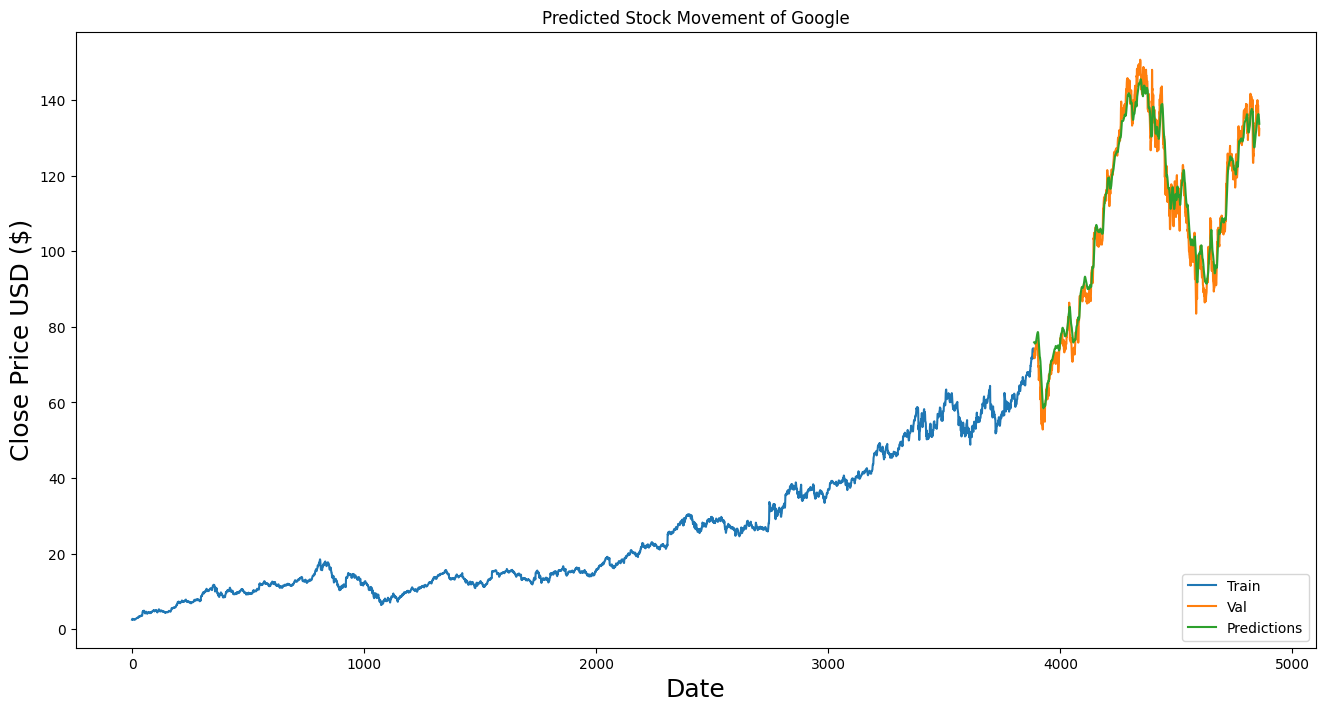

In [32]:
plt.figure(figsize=(16,8))
plt.title('Predicted Stock Movement of Google')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

#### Another way of Predicting New Prices

In [33]:
dfts = dfc.copy()
dfts.set_index('Date', inplace=True)

In [34]:
#Create a new dataframe with only the 'Close column
data = dfts.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .8 ))

training_data_len

3887

In [35]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[5.54588186e-05],
       [1.39474206e-03],
       [1.57790459e-03],
       ...,
       [8.82679683e-01],
       [8.64530737e-01],
       [8.76405091e-01]])

In [36]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([5.54588186e-05, 1.39474206e-03, 1.57790459e-03, 8.16681705e-04,
       1.00656406e-03, 1.32752354e-03, 1.03177016e-03, 3.36085838e-04,
       3.96577781e-04, 4.03324596e-05, 2.52061005e-04, 0.00000000e+00,
       2.63827450e-04, 3.84818082e-04, 3.86498039e-04, 8.93979963e-04,
       1.25862507e-03, 1.92911004e-03, 2.01480808e-03, 2.34584731e-03,
       2.93735406e-03, 3.25158697e-03, 2.99616605e-03, 3.08690396e-03,
       3.49692814e-03, 3.33056518e-03, 3.06674448e-03, 4.51189199e-03,
       5.22102272e-03, 4.97232163e-03, 5.47308373e-03, 5.88982099e-03,
       6.44603516e-03, 6.22926674e-03, 6.52669333e-03, 6.33849093e-03,
       5.92343362e-03, 6.28303886e-03, 6.87117895e-03, 7.05602144e-03,
       7.41058681e-03, 8.25919444e-03, 8.05418572e-03, 6.80228048e-03,
       8.29616024e-03, 1.21694999e-02, 1.46850634e-02, 1.37440379e-02,
       1.44447688e-02, 1.56765011e-02, 1.52295178e-02, 1.61352508e-02,
       1.59403285e-02, 1.54025939e-02, 1.42313536e-02, 1.16519315e-02,
     

In [37]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

3827/3827 [==============================] - 85s 22ms/step - loss: 1.8961e-04


In [38]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))

31/31 [==============================] - 1s 14ms/step


/tmp/ipykernel_19/3745433799.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



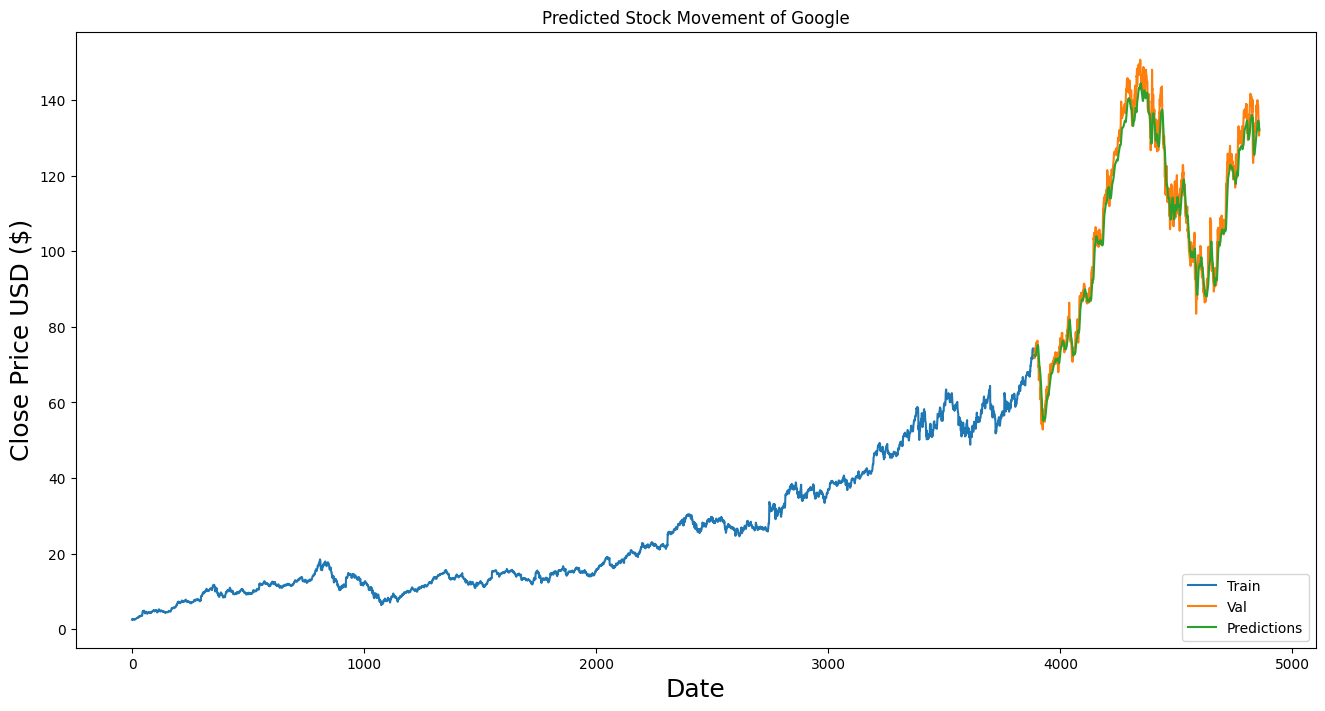

In [39]:

# Plot the data
train = GOOGLC[:training_data_len]
valid = GOOGLC[training_data_len:]
valid['Predictions'] = 0
# Assign the predicted values to the 'Predictions' column
valid.loc[:, 'Predictions'] = predictions.flatten()


# Plotting the data
# Plotting
plt.figure(figsize=(16, 8))
plt.title('Predicted Stock Movement of Google')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()